In [1]:
import torch
from model import feature_extractor
import einops
from model import descriptor
from model import decoder

In [2]:
from utils.utils import positionalencoding1d
positionalencoding1d(128,10).shape

torch.Size([10, 128])

In [3]:
x = torch.randn((128, 3, 32, 32))
m = feature_extractor.CNNFeatureExtractor(hid_dim=64)
temp = m(x)
m2 = descriptor.AutoregressiveMaskedDescriptor(64, 64, 64, 12)
tokens = m2(temp, 3)['tokens']
m3 = decoder.ImageGenerator(64, 64)
y = m3(tokens, (16, 16))

In [5]:
from utils.utils import imsshow

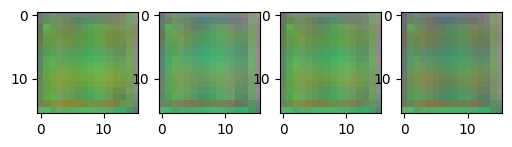

In [6]:
imsshow(y[:4].detach())